<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Importing necessary libraries here ##
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
import numpy as np


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
## Write your code here ##
# Loading the dataset
df = pd.read_csv('Boston.csv')
# Printing the shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

#print("The features in the dataset are:")
#for col in df.columns:
#   print(col)

column_features = {
    "1.CRIM": "Per capita crime rate by town",
    "2.ZN": "Proportion of residential land zoned for lots over 25,000 sq.ft",
    "3.INDUS": "Proportion of non-retail business acres per town",
    "4.CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "5.NX": "Nitrogen oxides concentration (parts per 10 million)",
    "6.RM": "Average number of rooms per dwelling",
    "7.AGE": "Proportion of owner-occupied units built prior to 1940",
    "8.DIS": "Weighted mean of distances to five Boston employment centres",
    "9.RAD": "Index of accessibility to radial highways",
    "10.TAX": "Full-value property-tax rate per $10,000",
    "11.PTRATIO": "Pupil-teacher ratio by town",
    "12.B": "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "13.LSTAT" : "Lower status of the population (percent)",
    "14.MEDV": "Median value of owner-occupied homes in $1000s"
}

# Printing the features of each column
for column, property in column_features.items():
    print(f"{column}: {property}")


The dataset has 506 rows and 14 columns.
1.CRIM: Per capita crime rate by town
2.ZN: Proportion of residential land zoned for lots over 25,000 sq.ft
3.INDUS: Proportion of non-retail business acres per town
4.CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.NX: Nitrogen oxides concentration (parts per 10 million)
6.RM: Average number of rooms per dwelling
7.AGE: Proportion of owner-occupied units built prior to 1940
8.DIS: Weighted mean of distances to five Boston employment centres
9.RAD: Index of accessibility to radial highways
10.TAX: Full-value property-tax rate per $10,000
11.PTRATIO: Pupil-teacher ratio by town
12.B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.LSTAT: Lower status of the population (percent)
14.MEDV: Median value of owner-occupied homes in $1000s


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
## Write your code here ##

# Spliting the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']
# Spliting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Making predictions on the train set and calculate error metrics
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
# Making predictions on the test set and calculate error metrics
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
# Printing error metrics
print(f'Train set: RMSE = {rmse_train}, R^2 = {r2_train}')
print(f'Test set: RMSE = {rmse_test}, R^2 = {r2_test}')
# Printing coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Train set: RMSE = 4.6520331848801675, R^2 = 0.7508856358979673
Test set: RMSE = 4.9286021826653075, R^2 = 0.668759493535636
         Coefficient
CRIM       -0.113056
ZN          0.030110
INDUS       0.040381
CHAS        2.784438
NX        -17.202633
RM          4.438835
AGE        -0.006296
DIS        -1.447865
RAD         0.262430
TAX        -0.010647
PTRATIO    -0.915456
B           0.012351
LSTAT      -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

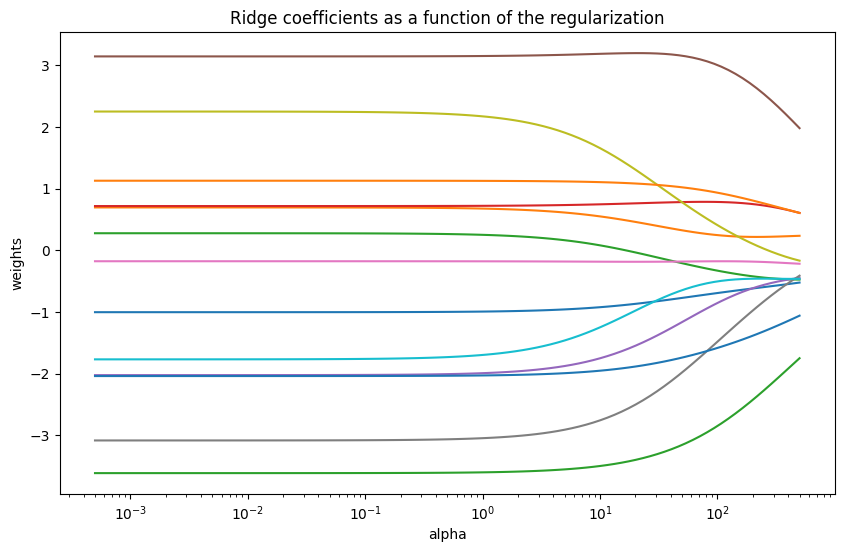

In [ ]:
## Write your code here ##
# Setting the alphas parameter
alphas = 10 ** np.linspace(3, -3, 100)*0.5

# Initializing lists to store coefficients
coefs = []

# For each alpha value
for a in alphas:
    # Training a Ridge regression model
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=a))
    ridge.fit(X_train, y_train)
    coefs.append(ridge.named_steps['ridge'].coef_)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

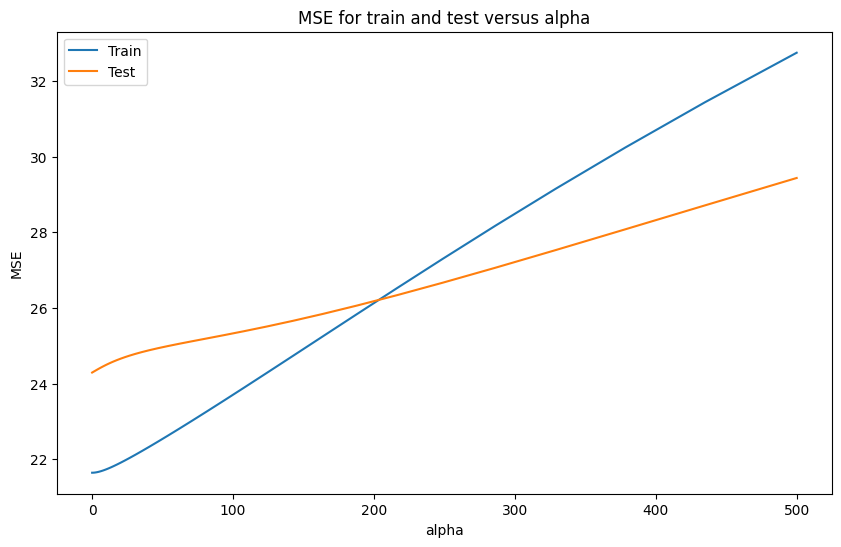

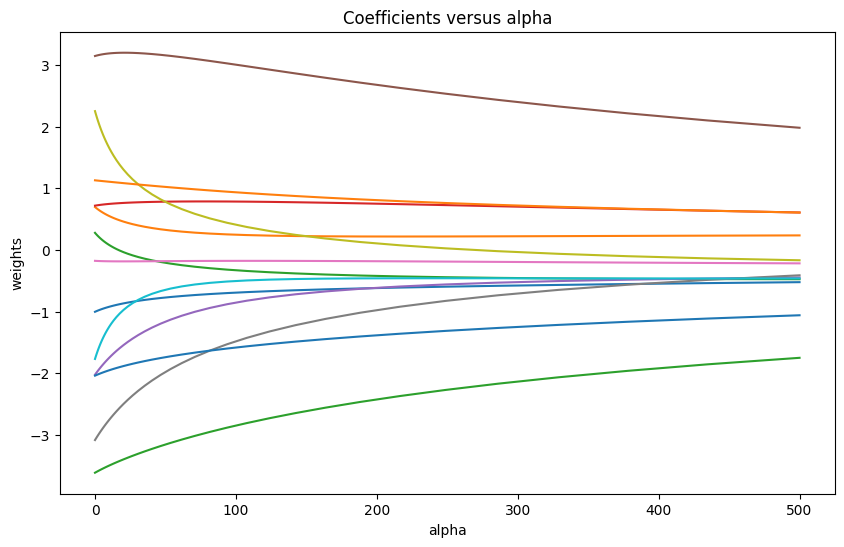

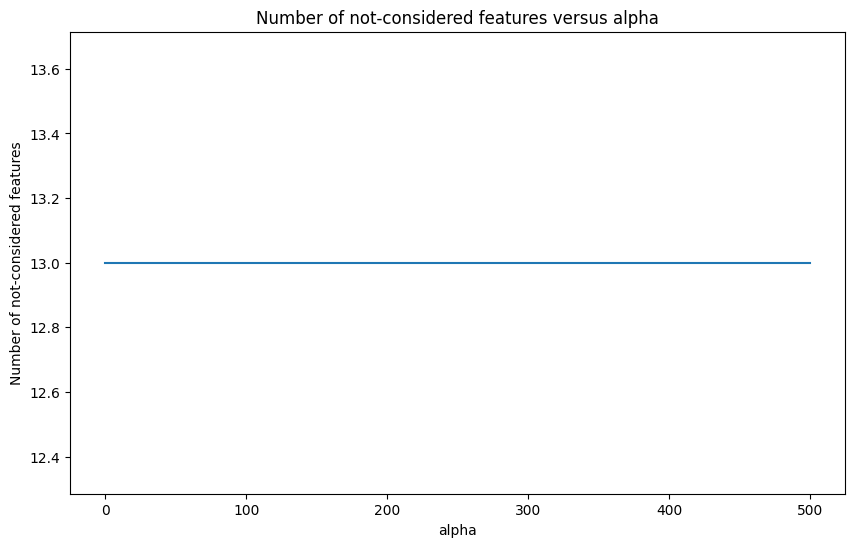

Optimal alpha: 7.599555414764666
Train set: MSE = 21.698245842268882, R^2 = 0.750231430047442
Test set: MSE = 24.450567573441596, R^2 = 0.666585214620831
         Coefficient
CRIM       -0.937554
ZN          0.579277
INDUS       0.118736
CHAS        0.741626
NX         -1.807306
RM          3.180726
AGE        -0.182319
DIS        -2.826364
RAD         1.769467
TAX        -1.340781
PTRATIO    -1.969610
B           1.111936
LSTAT      -3.521899


In [ ]:
## Write your code here ##

# Initializing lists to store coefficients and MSE
coefs = []
mse_train = []
mse_test = []
num_nonzero_coefs = []

# For each alpha value
for a in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=a))
    ridge.fit(X_train, y_train)

    # Storing the coefficients
    coefs.append(ridge.named_steps['ridge'].coef_)

    mse_train.append(mean_squared_error(y_train, ridge.predict(X_train)))
    mse_test.append(mean_squared_error(y_test, ridge.predict(X_test)))

    # Counting and storing the number of not-considered features
    num_nonzero_coefs.append(np.sum(ridge.named_steps['ridge'].coef_ != 0))

# Plotting MSE for train and test versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train')
plt.plot(alphas, mse_test, label='Test')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE for train and test versus alpha')
plt.legend()
plt.show()

# Plotting coefficients versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficients versus alpha')
plt.show()

# Plotting number of not-considered features versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, num_nonzero_coefs)
plt.xlabel('alpha')
plt.ylabel('Number of not-considered features')
plt.title('Number of not-considered features versus alpha')
plt.show()

# Selecting the optimal value of alpha using RidgeCV
ridge_cv = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, scoring='neg_mean_squared_error'))
ridge_cv.fit(X_train, y_train)
optimal_alpha = ridge_cv.named_steps['ridgecv'].alpha_

# Training a Ridge regression model with the optimal alpha
ridge_optimal = make_pipeline(StandardScaler(), Ridge(alpha=optimal_alpha))
ridge_optimal.fit(X_train, y_train)

# Calculating and print the MSE and $$R^2$$ for the model with the optimal alpha
mse_train_optimal = mean_squared_error(y_train, ridge_optimal.predict(X_train))
mse_test_optimal = mean_squared_error(y_test, ridge_optimal.predict(X_test))
r2_train_optimal = r2_score(y_train, ridge_optimal.predict(X_train))
r2_test_optimal = r2_score(y_test, ridge_optimal.predict(X_test))

print(f'Optimal alpha: {optimal_alpha}')
print(f'Train set: MSE = {mse_train_optimal}, R^2 = {r2_train_optimal}')
print(f'Test set: MSE = {mse_test_optimal}, R^2 = {r2_test_optimal}')

# Printing the coefficients of the model with the optimal alpha
coeff_df = pd.DataFrame(ridge_optimal.named_steps['ridge'].coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

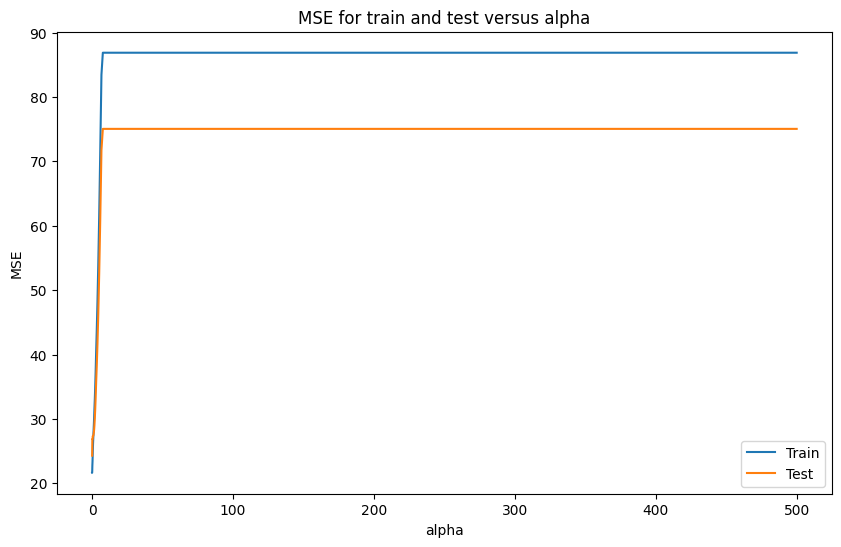

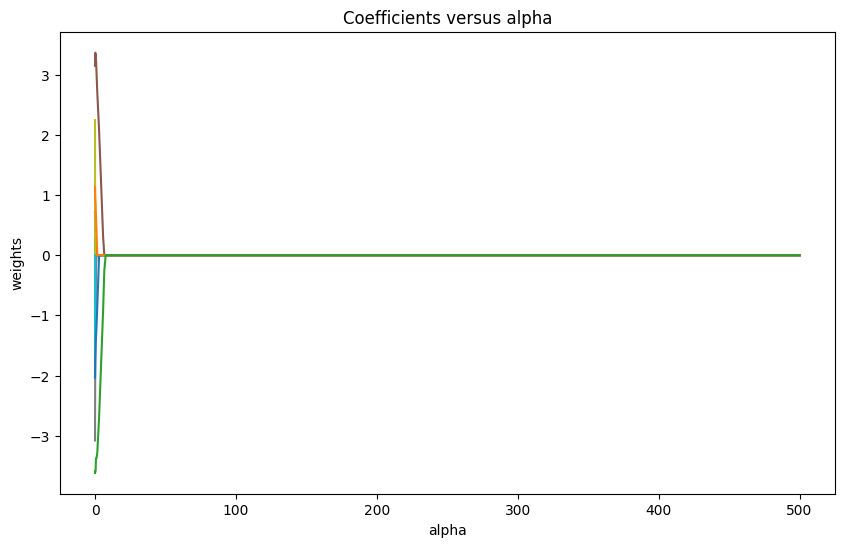

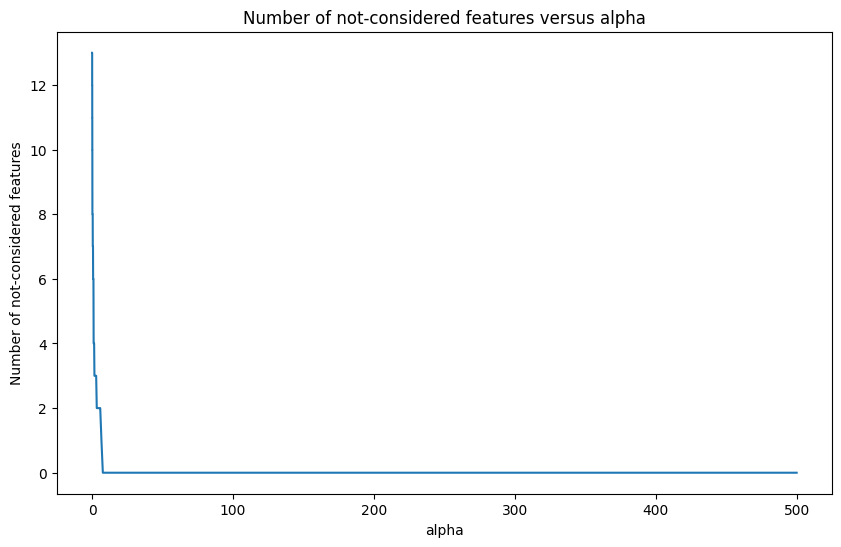

Lasso regression is particularly useful when you suspect that many of
your input features are not relevant to the output variable, and you’d like a
quick way to confirm which ones are not important. This is because Lasso regression
not only helps in reducing over-fitting but it can help us in feature selection.
When the alpha value is increased in Lasso regression, more coefficients become zero,
eliminating some of the features. So, it is used when we have a high dimension dataset.


In [ ]:
## Write your code here ##
# Initializing lists to store coefficients and MSE
coefs = []
mse_train = []
mse_test = []
num_nonzero_coefs = []

# For each alpha value
for a in alphas:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=a))
    lasso.fit(X_train, y_train)

    # Storing the coefficients
    coefs.append(lasso.named_steps['lasso'].coef_)

    # Calculating and store the MSE for train and test sets
    mse_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    mse_test.append(mean_squared_error(y_test, lasso.predict(X_test)))

    num_nonzero_coefs.append(np.sum(lasso.named_steps['lasso'].coef_ != 0))

# Plotting MSE for train and test versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train')
plt.plot(alphas, mse_test, label='Test')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE for train and test versus alpha')
plt.legend()
plt.show()

# Plotting coefficients versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficients versus alpha')
plt.show()

# Plotting number of not-considered features versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, num_nonzero_coefs)
plt.xlabel('alpha')
plt.ylabel('Number of not-considered features')
plt.title('Number of not-considered features versus alpha')
plt.show()
print(f"Lasso regression is particularly useful when you suspect that many of")
print(f"your input features are not relevant to the output variable, and you’d like a")
print(f"quick way to confirm which ones are not important. This is because Lasso regression")
print(f"not only helps in reducing over-fitting but it can help us in feature selection.")
print(f"When the alpha value is increased in Lasso regression, more coefficients become zero,")
print(f"eliminating some of the features. So, it is used when we have a high dimension dataset.")


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

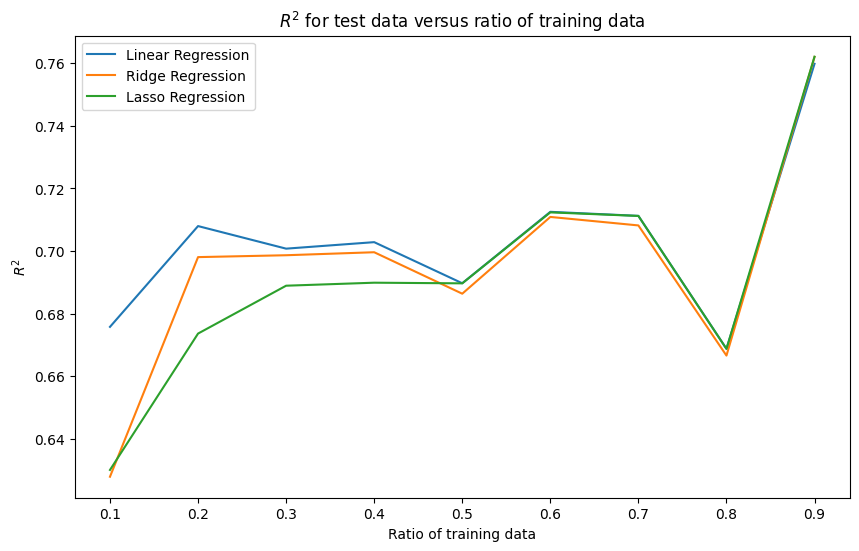

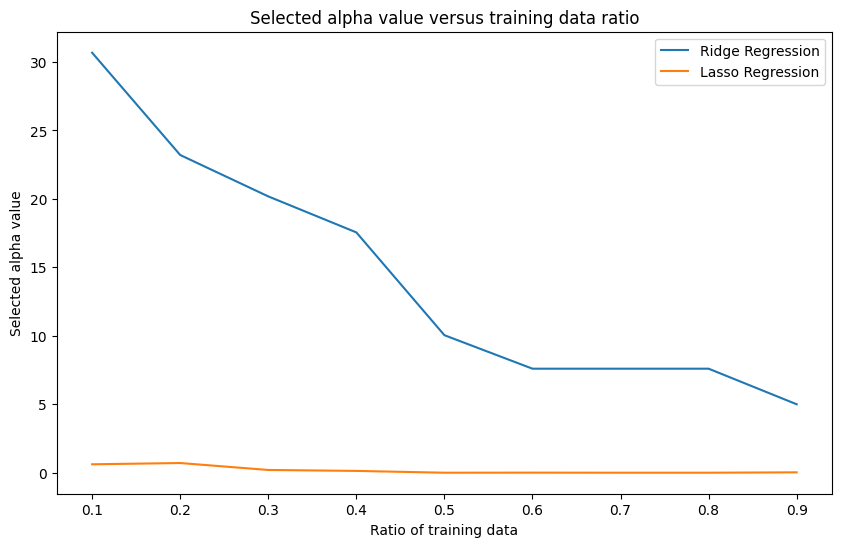

The overall behavior of these plots and their analysis would be as follows:
•	As the ratio of training data increases, the R^2 score for the test data should generally increase for all three methods.
This is because the models have more data to learn from, which should improve their performance on the test data.
•	The selected alpha value for Ridge and Lasso Regression should generally decrease as the ratio of training data increases.
This is because as the models have more data to learn from, they rely less on regularization to prevent overfitting.


In [ ]:
## Write you code here ##
# Initialize lists to store R^2 scores and selected alphas
r2_scores_lr = []
r2_scores_ridge = []
r2_scores_lasso = []
alphas_ridge = []
alphas_lasso = []

# Define the training data ratios, excluding 1.0
train_ratios = np.linspace(0.1, 0.9, 9)

# For each training data ratio
for ratio in train_ratios:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)

    # Train a Linear Regression model and calculate the R^2 score for the test set
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    r2_scores_lr.append(r2_score(y_test, lr.predict(X_test)))

    # Train a Ridge Regression model with cross-validation and calculate the R^2 score for the test set
    ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
    ridge.fit(X_train, y_train)
    r2_scores_ridge.append(r2_score(y_test, ridge.predict(X_test)))
    alphas_ridge.append(ridge.named_steps['ridgecv'].alpha_)

    # Train a Lasso Regression model with cross-validation and calculate the R^2 score for the test set
    lasso = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
    lasso.fit(X_train, y_train)
    r2_scores_lasso.append(r2_score(y_test, lasso.predict(X_test)))
    alphas_lasso.append(lasso.named_steps['lassocv'].alpha_)

# Plot R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 6))
plt.plot(train_ratios, r2_scores_lr, label='Linear Regression')
plt.plot(train_ratios, r2_scores_ridge, label='Ridge Regression')
plt.plot(train_ratios, r2_scores_lasso, label='Lasso Regression')
plt.xlabel('Ratio of training data')
plt.ylabel('$R^2$')
plt.title('$R^2$ for test data versus ratio of training data')
plt.legend()
plt.show()

# Plot selected alpha value versus training data ratio
plt.figure(figsize=(10, 6))
plt.plot(train_ratios, alphas_ridge, label='Ridge Regression')
plt.plot(train_ratios, alphas_lasso, label='Lasso Regression')
plt.xlabel('Ratio of training data')
plt.ylabel('Selected alpha value')
plt.title('Selected alpha value versus training data ratio')
plt.legend()
plt.show()
print(f"The overall behavior of these plots and their analysis would be as follows:")
print(f"•	As the ratio of training data increases, the R^2 score for the test data should generally increase for all three methods.")
print(f"This is because the models have more data to learn from, which should improve their performance on the test data.")
print(f"•	The selected alpha value for Ridge and Lasso Regression should generally decrease as the ratio of training data increases.")
print(f"This is because as the models have more data to learn from, they rely less on regularization to prevent overfitting.")

